In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [112]:
data = pd.read_csv('/content/png/COVID19_1.csv',sep =',',encoding='euc-kr')

In [113]:
print(data)

     구분별 상태별          data  people
0     전체  신규  2020. 04. 09    39.0
1     전체  신규  2020. 04. 10    27.0
2     전체  신규  2020. 04. 11    30.0
3     전체  신규  2020. 04. 12    32.0
4     전체  신규  2020. 04. 13    25.0
...   ..  ..           ...     ...
9149  검역  신규  2021. 02. 05     7.0
9150  검역  신규  2021. 02. 06    11.0
9151  검역  신규  2021. 02. 07    27.0
9152  검역  신규  2021. 02. 08     9.0
9153  검역  신규  2021. 02. 09    11.0

[9154 rows x 4 columns]


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9154 entries, 0 to 9153
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분별     9154 non-null   object 
 1   상태별     9154 non-null   object 
 2   data    9154 non-null   object 
 3   people  9099 non-null   float64
dtypes: float64(1), object(3)
memory usage: 286.2+ KB


In [115]:
def get_people(i):
   z = data['people'][i]
   return z

In [116]:
def mov_avg_filter(x_n, x_meas):
  n = len(x_n)
  for i in range(n-1):
    x_n[i] = x_n[i+1]
  x_n[n-1] = x_meas
  x_avg = np.mean(x_n)
  return x_avg, x_n

In [117]:
len(data)

9154

In [118]:
n = 10
n_samples = 9154
time_end = 10

In [119]:
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

In [120]:
for i in range(n_samples):

    x_meas = get_people(i)
    
    if i == 0:
        x_avg, x_n = x_meas, x_meas * np.ones(n)
        print(x_meas * np.ones(n))
    else:
        x_avg, x_n = mov_avg_filter(x_n, x_meas)
        print(x_n)

    x_meas_save[i] = x_meas
    x_avg_save[i] = x_avg

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[4. 0. 2. 0. 2. 1. 3. 2. 0. 4.]
[0. 2. 0. 2. 1. 3. 2. 0. 4. 0.]
[2. 0. 2. 1. 3. 2. 0. 4. 0. 0.]
[0. 2. 1. 3. 2. 0. 4. 0. 0. 0.]
[2. 1. 3. 2. 0. 4. 0. 0. 0. 5.]
[1. 3. 2. 0. 4. 0. 0. 0. 5. 5.]
[3. 2. 0. 4. 0. 0. 0. 5. 5. 2.]
[2. 0. 4. 0. 0. 0. 5. 5. 2. 7.]
[0. 4. 0. 0. 0. 5. 5. 2. 7. 1.]
[4. 0. 0. 0. 5. 5. 2. 7. 1. 5.]
[0. 0. 0. 5. 5. 2. 7. 1. 5. 6.]
[ 0.  0.  5.  5.  2.  7.  1.  5.  6. 18.]
[ 0.  5.  5.  2.  7.  1.  5.  6. 18. 22.]
[ 5.  5.  2.  7.  1.  5.  6. 18. 22. 24.]
[ 5.  2.  7.  1.  5.  6. 18. 22. 24. 28.]
[ 2.  7.  1.  5.  6. 18. 22. 24. 28. 22.]
[ 7.  1.  5.  6. 18. 22. 24. 28. 22. 52.]
[ 1.  5.  6. 18. 22. 24. 28. 22. 52. 31.]
[ 5.  6. 18. 22. 24. 28. 22. 52. 31. 32.]
[ 6. 18. 22. 24. 28. 22. 52. 31. 32. 15.]
[18. 22. 24. 28. 22. 52. 31. 32. 15. 31.]
[22. 24. 28. 22. 52. 31. 32. 15. 31. 29.]
[24. 28. 22. 52. 31. 32. 15. 31. 29. 34.]
[28. 22. 52. 31. 32. 15. 31. 29. 34. 35.]
[22. 52. 31. 32. 15. 31. 29. 34. 35. 27.]
[52. 31. 32. 15. 31. 29.

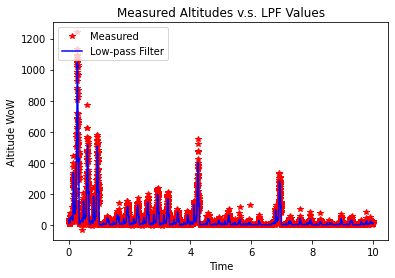

In [122]:
plt.plot(time, x_meas_save, 'r*', label='Measured')
plt.plot(time, x_avg_save, 'b-', label='Low-pass Filter')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. LPF Values')
plt.xlabel('Time')
plt.ylabel('Altitude WoW')
plt.savefig('/content/png')